In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [51]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
#splitting prediction categories and labels and 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [11]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

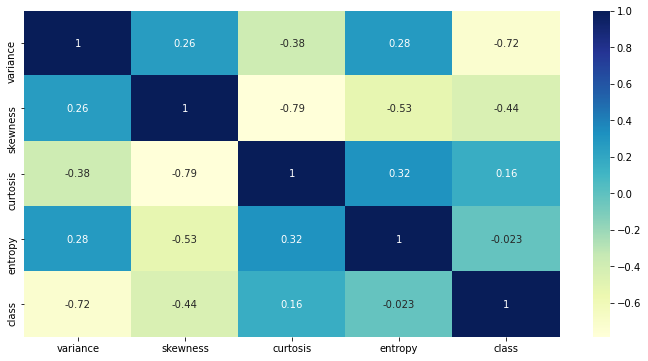

In [14]:
#corellation matrix
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 4), (412, 4), (960,), (412,))

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix

In [21]:
models = [['LogisticRegression : ', LogisticRegression()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()]]

In [32]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    print(name, model.score(X_train, y_train))
    predictions = model.predict(X_test)
    print(name, model.score(X_test, y_test))

LogisticRegression :  0.9916666666666667
LogisticRegression :  0.9878640776699029
DecisionTreeRegressor :  1.0
DecisionTreeRegressor :  0.9311809482902618
RandomForestRegressor :  0.9935880768571692
RandomForestRegressor :  0.9855470160116448


In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
n_features=X.shape[1]
model=Sequential()
model.add(Dense(10,activation='relu',kernel_initializer='he_normal',input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))

In [38]:
ypred = model.predict(X_test)
yhat = (ypred > 0.5).flatten().astype(int) 
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 1.000


In [53]:
row = [2,3,4,1]
# make prediction and convert to class label
ypred = model.predict([row])
yhat = (ypred > 0.5).flatten().astype(int)
# invert transform to get label for class
# yhat = le.inverse_transform(yhat)
# # report prediction
Predicted=yhat[0]
if Predicted==0:
    print('Fake:',yhat[0])
else:
    print('Real:',yhat[0])

Fake: 0


In [55]:
# Saving the model for Future Inferences
from tensorflow.keras import backend as K
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")